### Difference between a numba version of a method and the pure python one

In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

#### crossover

In [2]:
@njit(cache=True)
def crossover_numba(population, k):
    n_parents, n_features = population.shape
    new_population = np.zeros((n_parents // 2, n_features))

    # Perform crossover between consecutive parents
    for i in range(0, n_parents, 2):
        parent1 = population[i]
        parent2 = population[i + 1]

        indices = np.random.choice(n_features, size=k, replace=False)

        child = parent1.copy()
        child[indices] = parent2[indices]

        new_population[i // 2] = child

    return new_population

In [3]:
def crossover(population, k):
    n_parents, n_features = population.shape
    new_population = np.zeros((n_parents // 2, n_features))

    # Perform crossover between consecutive parents
    for i in range(0, n_parents, 2):
        parent1 = population[i]
        parent2 = population[i + 1]

        indices = np.random.choice(n_features, size=k, replace=False)

        child = parent1.copy()
        child[indices] = parent2[indices]

        new_population[i // 2] = child

    return new_population

First time a function is executed numba is going to be slower due to compilation

In [4]:
data = np.random.randint(0, 100, size=(1000, 20))
K=7

In [5]:
result_numba_0 = %timeit -n1 -r1 -o crossover_numba(data, K)
result_python_0 = %timeit -n1 -r1 -o crossover(data, K)

166 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.79 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Text(0.5, 1.0, 'First time run | len(data) = 1000 K = 7')

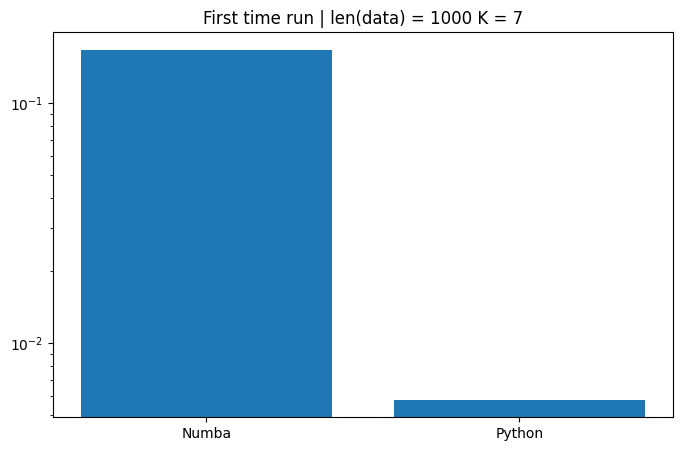

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.set_yscale('log')
ax.bar(["Numba", "Python"], [result_numba_0.average, result_python_0.average])
ax.set_title(f"First time run | {len(data) = } {K = }")

After the first time, numba is going to be way faster.

In [7]:
result_numba = %timeit -n10 -r10 -o crossover_numba(data, 7)
result_python = %timeit -n10 -r10 -o crossover(data, 7)

428 µs ± 11.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
5.71 ms ± 479 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


Text(0.5, 1.0, 'Average over 100 runs | len(data) = 1000 K = 7')

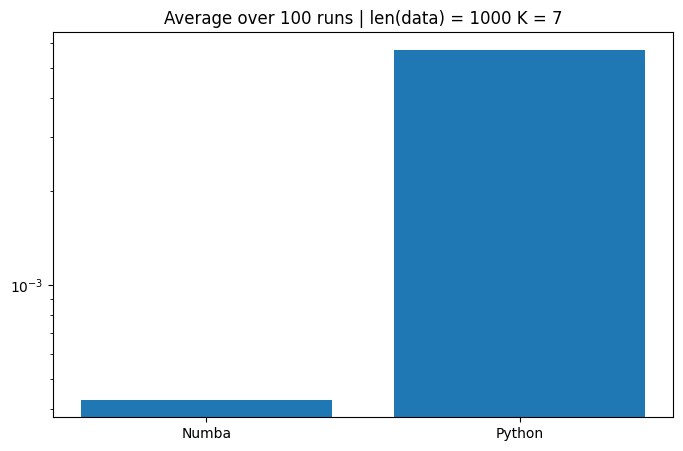

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.set_yscale('log')
ax.bar(["Numba", "Python"], [result_numba.average, result_python.average])
ax.set_title(f"Average over 100 runs | {len(data) = } {K = }")

In [9]:
print(f"{result_python_0.average / result_numba_0.average = }")
print(f"{result_python.average / result_numba.average = }")

result_python_0.average / result_numba_0.average = 0.03483445767239884
result_python.average / result_numba.average = 13.351805280432862


Dataset increase

898 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
632 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
60.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.54 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
329 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
66.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Text(0.5, 1.0, 'Python')

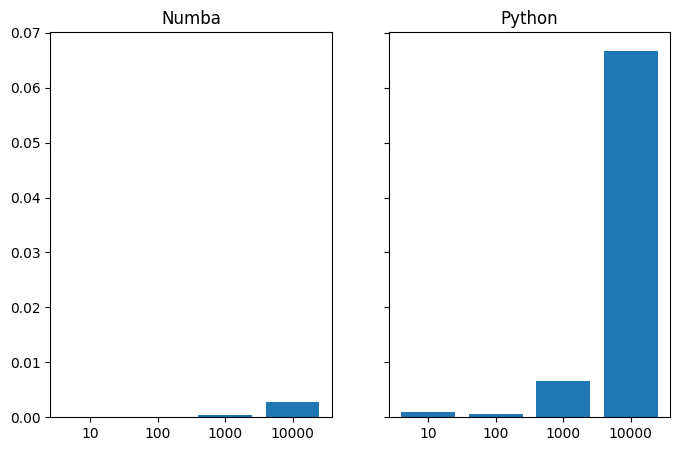

In [20]:
numbas = []
pythons = []
sizes = [*range(1,5)]
for i in sizes:
    data = np.random.randint(0, 100, size=(10**i, 20))
    res = %timeit -n1 -r1 -o crossover(data, 7)
    pythons.append(res.average)
    res = %timeit -n1 -r1 -o crossover_numba(data, 7)
    numbas.append(res.average)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
ax1.bar([f"{10**i}" for i in sizes], numbas)
ax2.bar([f"{10**i}" for i in sizes], pythons)
ax1.set_title("Numba")
ax2.set_title("Python")